<a href="https://colab.research.google.com/github/iffyaiyan/airbnb-Seatle/blob/master/SeattleAirbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the datasets

In [0]:
listings_df = pd.read_csv("/content/listings.csv")
calendar_df  = pd.read_csv("/content/calendar.csv")
reviews_df = pd.read_csv("/content/reviews.csv")

Since we are going to work on listings datasets mostly, let's try to dig useful insights from this datasets

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [4]:
# Getting the columns name
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

From above columns name one can see that there are various key factor for one to opt for lodging

In [5]:
# Looking at the shape of the listings_df datasets
listings_df.shape

(3818, 92)

Hence from above we can see that there is 3818 rows and 92 columns

In [6]:
# Looking at the datatypes of the listings_df datasets
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [7]:
# Extracting information from the listings_df datasets
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
listings_df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

There are many columns having lots of missing values.
In general these mising values can either be imputed or dropped.
But one must be cautious while either dropping or imputing certain rows because it can sometime leads to dropping of major role playing columns

Let's look at the Number and Name's of Both Categorical and Numerical features in the datasets 

In [21]:
# Counting the number of numeric columns in the dataset and Printing their name as well
Numeric_Features = listings_df.select_dtypes(include = ['int, float']).shape[1]
Name_Numeric_Features = listings_df.select_dtypes(include = ['int', 'float']).columns
print(Numeric_Features)
print(Name_Numeric_Features)

0
Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')


In [24]:
Categorical_Features = listings_df.select_dtypes(include = ['object']).shape[1]
Name_Categorical_Features = listings_df.select_dtypes(include = ['object']).columns
print(Categorical_Features)
print(Name_Categorical_Features)

55
Index(['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'neighborhood_overview', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdiction_names',
       'instant_bookable',

# Question 1: How no of beds, bedrooms and bathrooms in a Hotel are affected by their Price

In [0]:
# Dropping a few more columns with extremely high level of NaN
# Except security_deposit and cleaning_fee because here NaN seems to be 0
listings_df.drop(['space', 'notes', 'square_feet', 'host_response_time', 'host_response_rate'], axis=1, inplace=True)

In [0]:
# Taking care of missing values in several columns

# NaNs in bathrooms and bedrooms can be replaced by 1 to be on a safe side because in general a good hotel must have this much as a bare minimum

listings_df.bedrooms.fillna(1, inplace = True)
listings_df.bathrooms.fillna(1, inplace = True)

# Filling the empty values in beds by value in column 'accomodates'
listings_df.beds.fillna(listings_df['accommodates'], inplace = True)

In [0]:
# Cleaning i.e. replacing('$') from the price, weekly-price and monthly-price columns
listings_df.price = listings_df.price.str.replace('$', '').str.replace(',','').astype(float)
listings_df.monthly_price = listings_df.monthly_price.str.replace('$', '').str.replace(',', '').astype(float)
listings_df.weekly_price = listings_df.weekly_price.str.replace('$', '').str.replace(',', '').astype(float)


In [0]:
# Grouping by beds on the basis of their mean price
beds_price = listings_df.groupby('beds').mean()['price'].sort_values(ascending = False)

In [0]:
def bar_plot(var,title):
    
    """
    var: dataframe that is used to plot bar graph
    title: string that is the title for the plot
    
    """
    
    fig,ax = plt.subplots(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    var.plot(kind="bar",color='#0ae40e');
    plt.title(title);

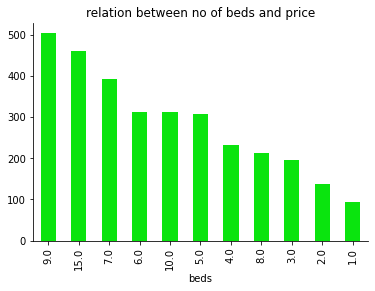

In [15]:
bar_plot(beds_price, "relation between no of beds and price")

In [0]:
bedrooms_price = listings_df.groupby('bedrooms').mean()['price'].sort_values(ascending = False)

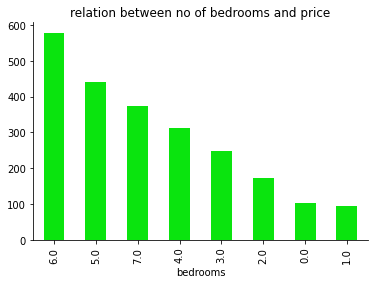

In [17]:
bar_plot(bedrooms_price, "relation between no of bedrooms and price")

In [0]:
bathrooms_price = listings_df.groupby('bathrooms').mean()['price'].sort_values(ascending = False)

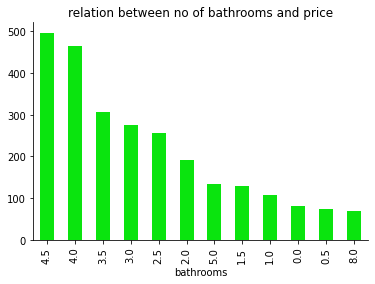

In [19]:
bar_plot(bathrooms_price, "relation between no of bathrooms and price")

From the above bar plot we can see that more the number of beds in an Hotel more is the price charged

# Question 2: Best time to visit Seattle and availabilty of Room with time of the year and price

In [25]:
# Reading the calendar_df dataset
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [26]:
listings_df.instant_bookable.value_counts()/listings_df.shape[0]

f    0.845207
t    0.154793
Name: instant_bookable, dtype: float64

From above we ca get the idea that most of Hotels are not instant bookable so one must have to book it prior to visit there

In [27]:
# checking the availability for instant booking or for prior booking 
calendar_df.available.value_counts()/calendar_df.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

We can see that 67% of time listings are available and 33% of time they are not

In [0]:
# Converting datetime object to datetime
calendar_df['Datetime'] = pd.to_datetime(calendar_df['date'], format = "%Y/%m/%d")

In [0]:
# Selecting only the month column
calendar_df['month'] = pd.DatetimeIndex(calendar_df['Datetime']).month

In [0]:
calendar_df['Month'] = calendar_df['Datetime'].dt.strftime('%b')

In [31]:
# now grouping data which are available by month only
availability_of_room_by_month = calendar_df[calendar_df['available'] == 't'].groupby(['Month']).count()['listing_id'].sort_values(ascending=False)
availability_of_room_by_month

Month
Dec    87061
Mar    83938
Oct    82438
Nov    81780
May    79971
Sep    77246
Jun    77244
Aug    76347
Apr    76037
Jul    74222
Feb    73321
Jan    64937
Name: listing_id, dtype: int64

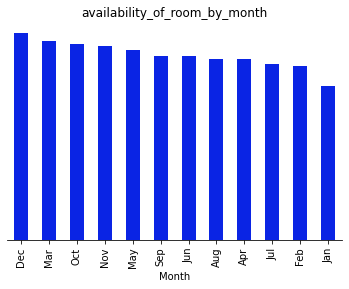

In [32]:
# Plotting bar graph by availability by month
fig,ax = plt.subplots(1)
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', length=0)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
(availability_of_room_by_month).plot(kind="bar" ,color='#0a24e4');

plt.title("availability_of_room_by_month");

In [0]:
# Since review can play a vital role in deciding the visit so lets draw some insights from review_df
reviews_df['datetime'] = pd.to_datetime(reviews_df['date'], format = "%Y/%m/%d")

In [0]:
reviews_df['month'] = pd.DatetimeIndex(reviews_df['datetime']).month

In [0]:
reviews_df['Month'] = reviews_df['datetime'].dt.strftime('%b')

In [36]:
comments_per_month = reviews_df.groupby(['Month']).count()['comments'].sort_values(ascending=False)
comments_per_month

Month
Aug    13017
Sep    11675
Jul    10501
Oct     8954
Jun     8542
Nov     6665
May     5853
Dec     5730
Apr     4231
Mar     4157
Jan     2864
Feb     2642
Name: comments, dtype: int64

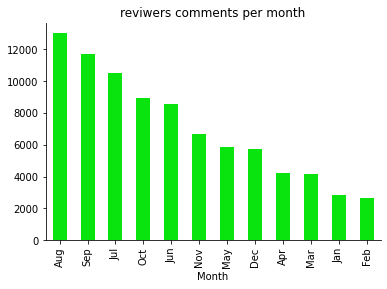

In [37]:
# Plotting the bargraph of comments per month
bar_plot(comments_per_month,"reviwers comments per month")

we can see that most room are available in the month of December, March etc which can be clear sign that there is less footfall in this months but high reviews in the month of Aug,Sep and July is indicating people are more interested to visit Seattle in this month 

# Question 3: Who are among Popular Neighbourhoods

In [0]:
popular_neighborhood_groups = listings_df.groupby(by='neighbourhood_group_cleansed')['number_of_reviews'].sum().reset_index()
popular_neighborhood_groups = popular_neighborhood_groups.sort_values(by='number_of_reviews', ascending=False).reset_index()

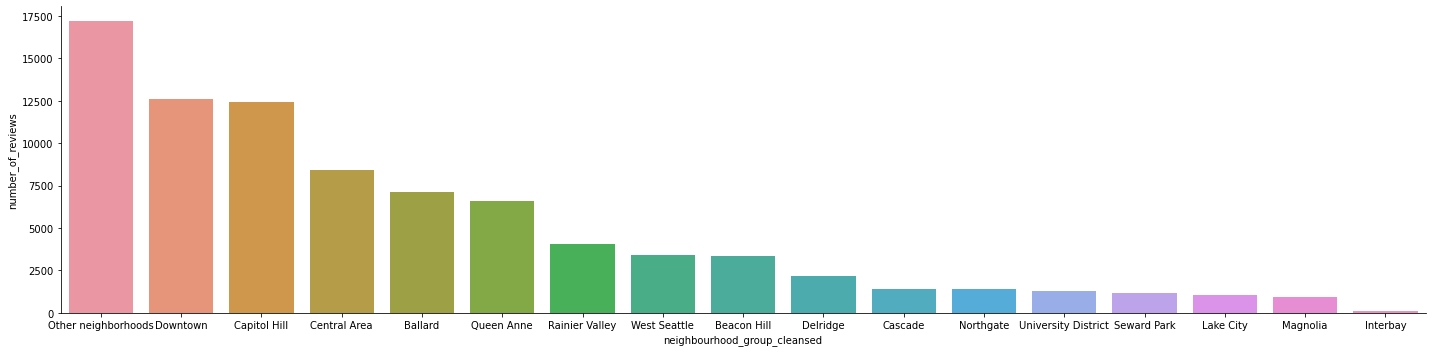

In [39]:
sns.catplot(x="neighbourhood_group_cleansed", y = "number_of_reviews", kind = "bar", data = popular_neighborhood_groups, height = 5, aspect = 4)

So popular neighbourhood excluding 'Other neighbourhoods' are Downtown, Capital Hill and Central Area